# **Customer Segmentation Using Clustering By Ali Raza**

Problem Statement :

Use clustering algorithms to segment customers based on their spending behavior,
age, income, and preferences.  

# Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [9]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
df.shape

(200, 5)

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


from matplotlib import pyplot as plt
_df_0['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='CustomerID', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Annual Income (k$)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Spending Score (1-100)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [13]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# Data Visualization

In [14]:
plt.style.use('fivethirtyeight')

### Histograms

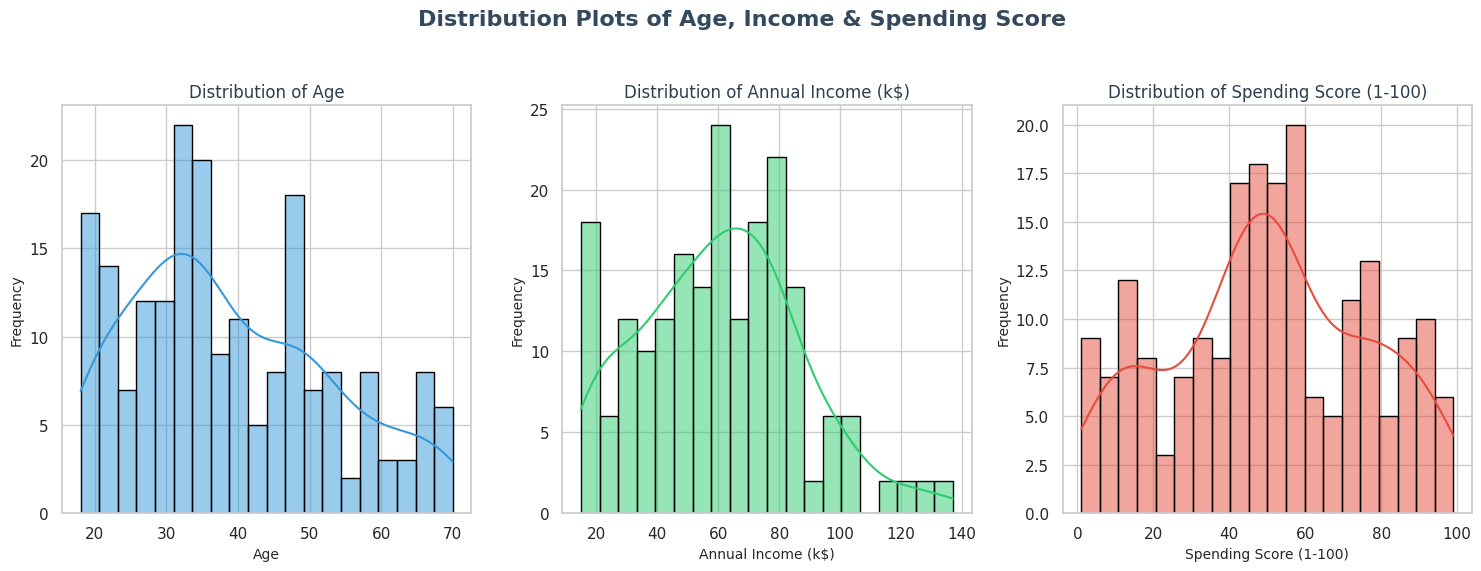

In [71]:
colors = {
    'Age': '#3498db',  # Blue
    'Annual Income (k$)': '#2ecc71',  # Green
    'Spending Score (1-100)': '#e74c3c'  # Red
}

plt.figure(1, figsize=(15, 6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    # Distplot with specific color
    sns.histplot(df[x], kde=True, bins=20, color=colors[x], edgecolor='black')

    plt.title(f'Distribution of {x}', fontsize=12, color='#2c3e50')
    plt.xlabel(x, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.suptitle('Distribution Plots of Age, Income & Spending Score', fontsize=16, fontweight='bold', color='#34495e')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Count Plot of Gender

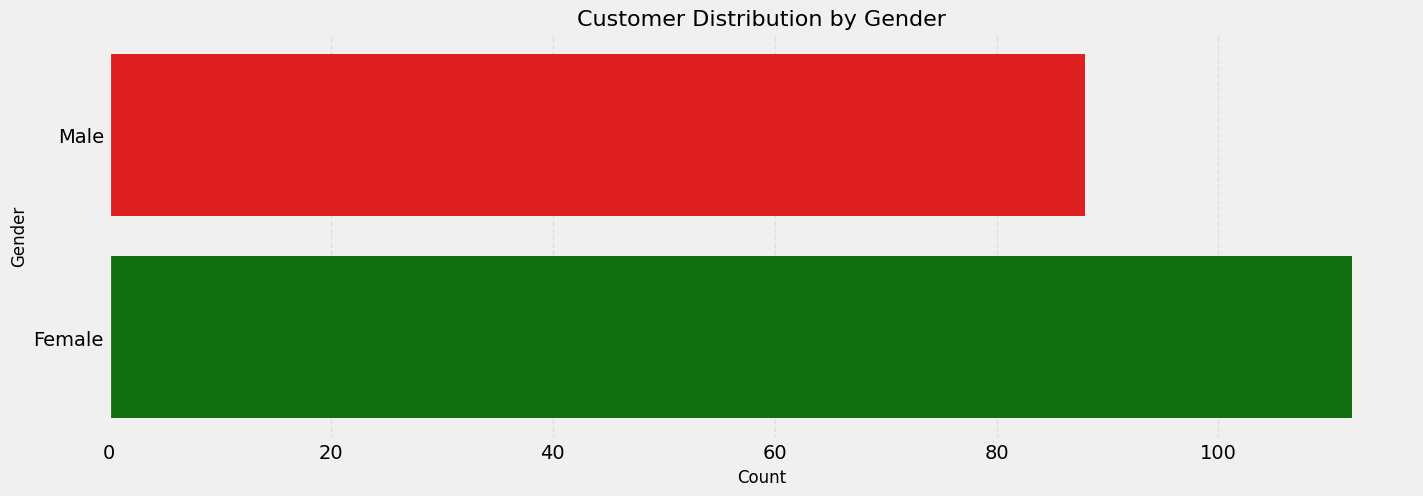

In [21]:
plt.figure(1, figsize=(15, 5))

sns.countplot(y='Genre', data=df, palette={'Male': 'red', 'Female': 'green'})
plt.title('Customer Distribution by Gender', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

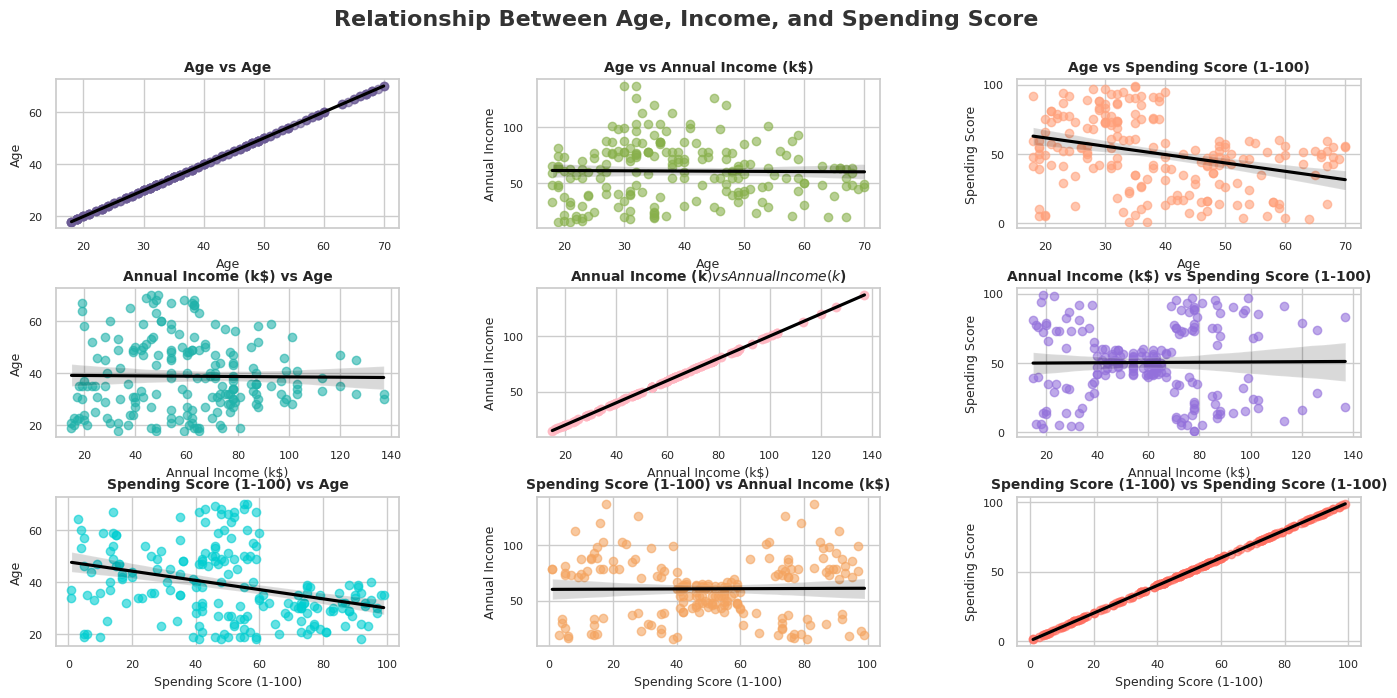

In [25]:
sns.set(style='whitegrid', palette='pastel')

# Define color palette for different plots
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#20B2AA', '#FFB6C1', '#9370DB', '#00CED1', '#F4A460']

plt.figure(1, figsize=(15, 7))

n = 0
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, x in enumerate(features):
    for j, y in enumerate(features):
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "black"},
                    color=colors[n % len(colors)])

        plt.xlabel(x, fontsize=9)
        plt.ylabel(y if len(y.split()) == 1 else ' '.join(y.split()[:2]), fontsize=9)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.title(f'{x} vs {y}', fontsize=10, fontweight='bold')

plt.suptitle("Relationship Between Age, Income, and Spending Score", fontsize=16, fontweight='bold', color='#333')
plt.show()

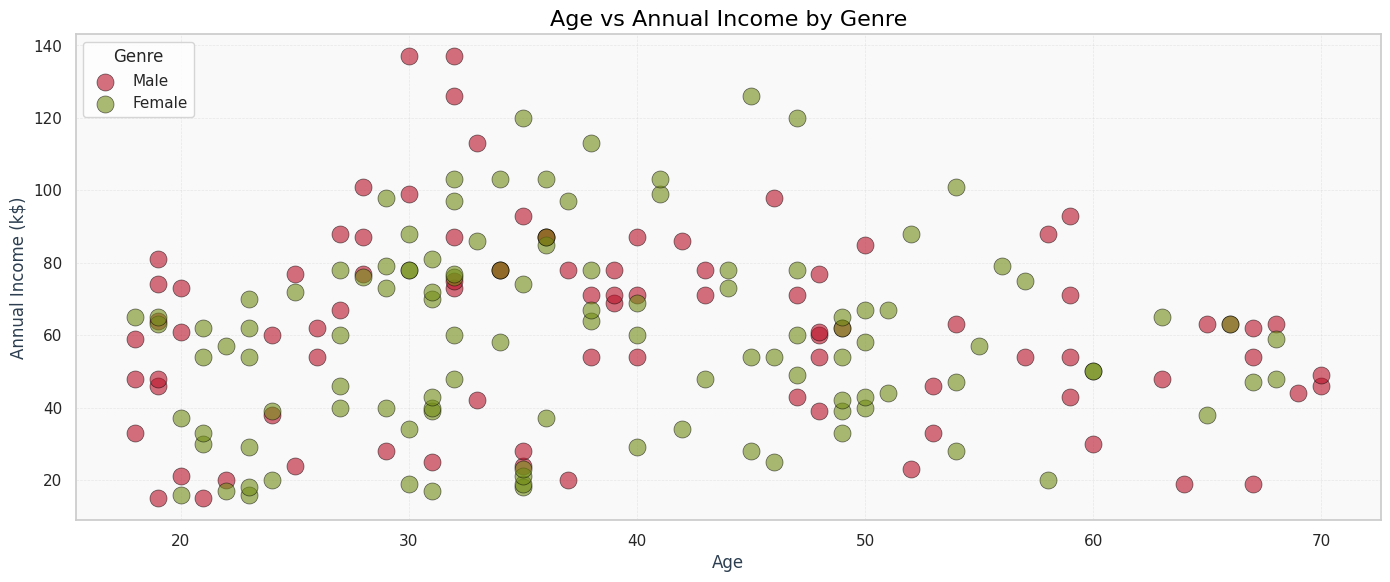

In [39]:
colors = {'Male': '#B91028', 'Female': '#718C15'}
plt.figure(1, figsize=(15, 6))

for gender in ['Male', 'Female']:
    plt.scatter(
        x='Age',
        y='Annual Income (k$)',
        data=df[df['Genre'] == gender],
        s=150,
        alpha=0.6,
        label=gender,
        color=colors[gender],
        edgecolor='black',
        linewidth=0.5
    )
plt.xlabel('Age', fontsize=12, color='#2c3e50')
plt.ylabel('Annual Income (k$)', fontsize=12, color='#2c3e50')
plt.title('Age vs Annual Income by Genre', fontsize=16, color='#000000')
plt.legend(title='Genre', title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.gca().set_facecolor('#f9f9f9')
plt.show()

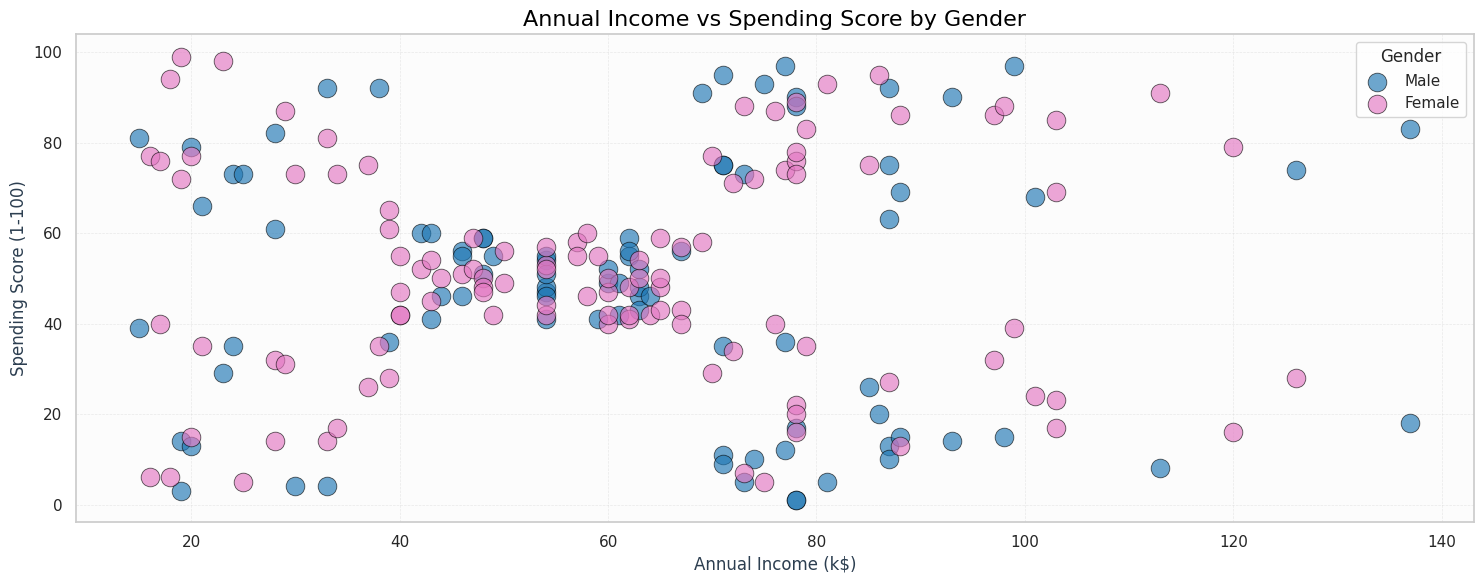

In [40]:
colors = {'Male': '#1f77b4', 'Female': '#e377c2'}  # blue & pink

plt.figure(1, figsize=(15, 6))

# Gender-wise scatter plot
for gender in ['Male', 'Female']:
    plt.scatter(
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        data=df[df['Genre'] == gender],
        s=180,
        alpha=0.65,
        label=gender,
        color=colors[gender],
        edgecolor='black',
        linewidth=0.6
    )

# Add modern axis labels and title
plt.xlabel('Annual Income (k$)', fontsize=12, color='#2c3e50')
plt.ylabel('Spending Score (1-100)', fontsize=12, color='#2c3e50')
plt.title('Annual Income vs Spending Score by Gender', fontsize=16, color='#000000')

# Elegant legend
plt.legend(title='Gender', title_fontsize=12, fontsize=11, loc='upper right')

# Light background and grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.gca().set_facecolor('#fcfcfc')  # subtle light background
plt.tight_layout()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

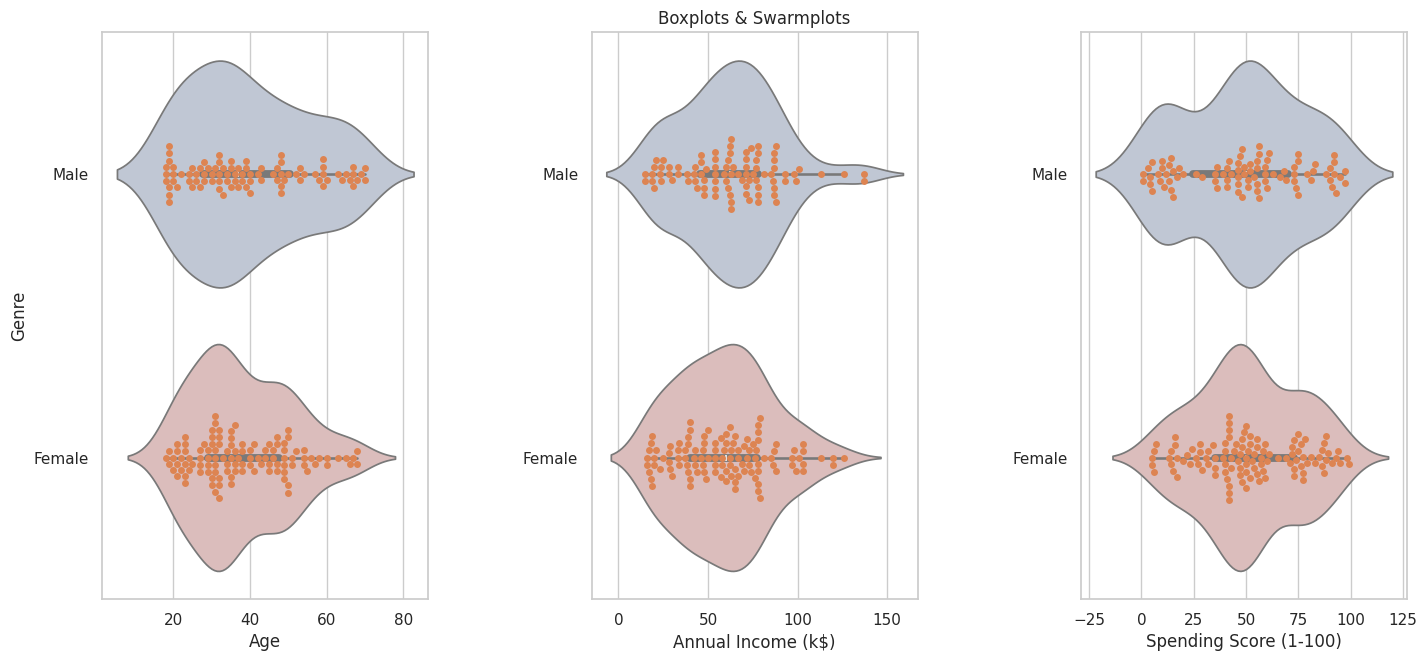

In [44]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Genre' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Genre' , data = df)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Clustering using K- means

## 1.Segmentation using Age and Spending Score

In [45]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

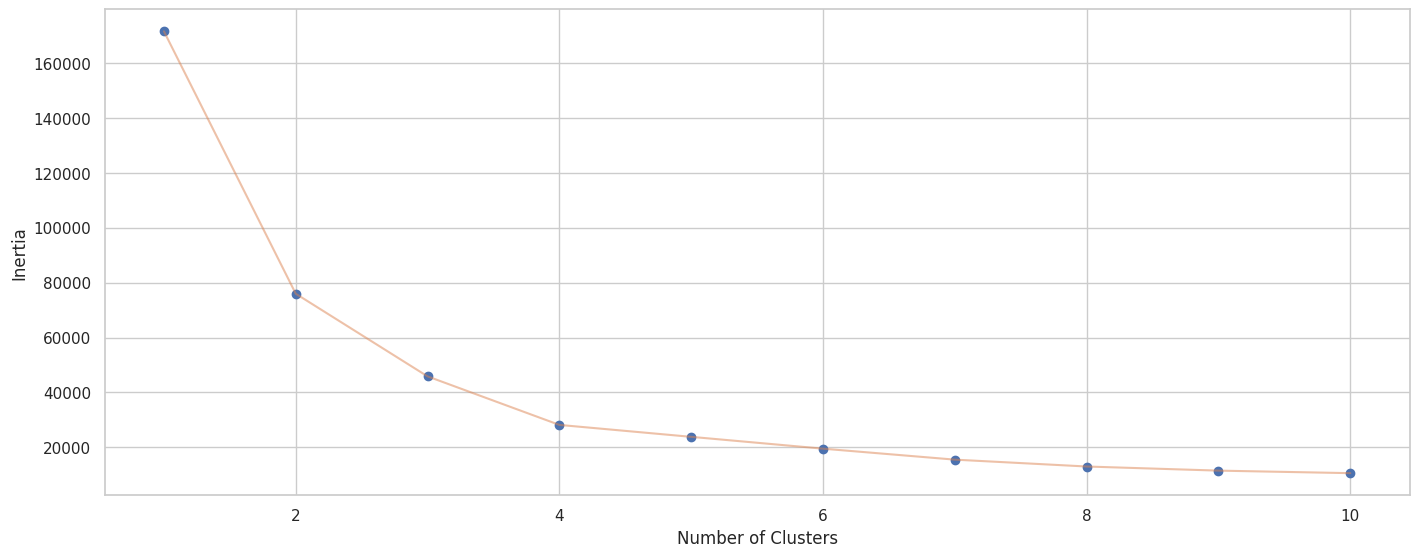

In [46]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [82]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [83]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

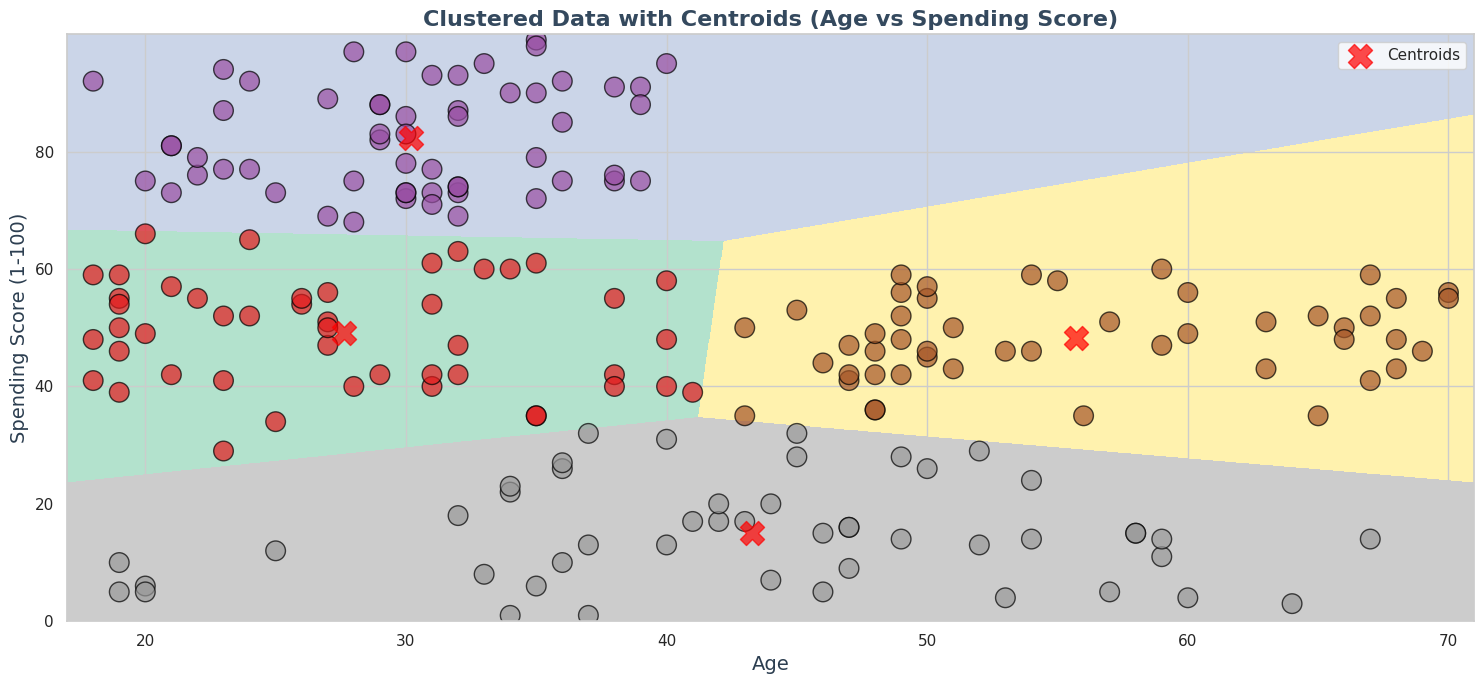

In [84]:
# Create the plot
plt.figure(1, figsize=(15, 7))

# Clear the figure for a fresh plot
plt.clf()

# Reshape Z for the decision boundary plot
Z = Z.reshape(xx.shape)

# Plot decision boundaries with smooth pastel color scheme
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter plot for the data points, colored by their labels
plt.scatter(x=df['Age'], y=df['Spending Score (1-100)'],
            c=labels1, s=200, edgecolors='black', alpha=0.7, cmap='Set1')

# Scatter plot for the centroids with larger red markers
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.7, marker='X', label='Centroids')

# Adding labels and title
plt.xlabel('Age', fontsize=14, color='#2c3e50')
plt.ylabel('Spending Score (1-100)', fontsize=14, color='#2c3e50')
plt.title('Clustered Data with Centroids (Age vs Spending Score)', fontsize=16, fontweight='bold', color='#34495e')

# Adding a legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### 2. Segmentation using Annual Income and Spending Score

In [51]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

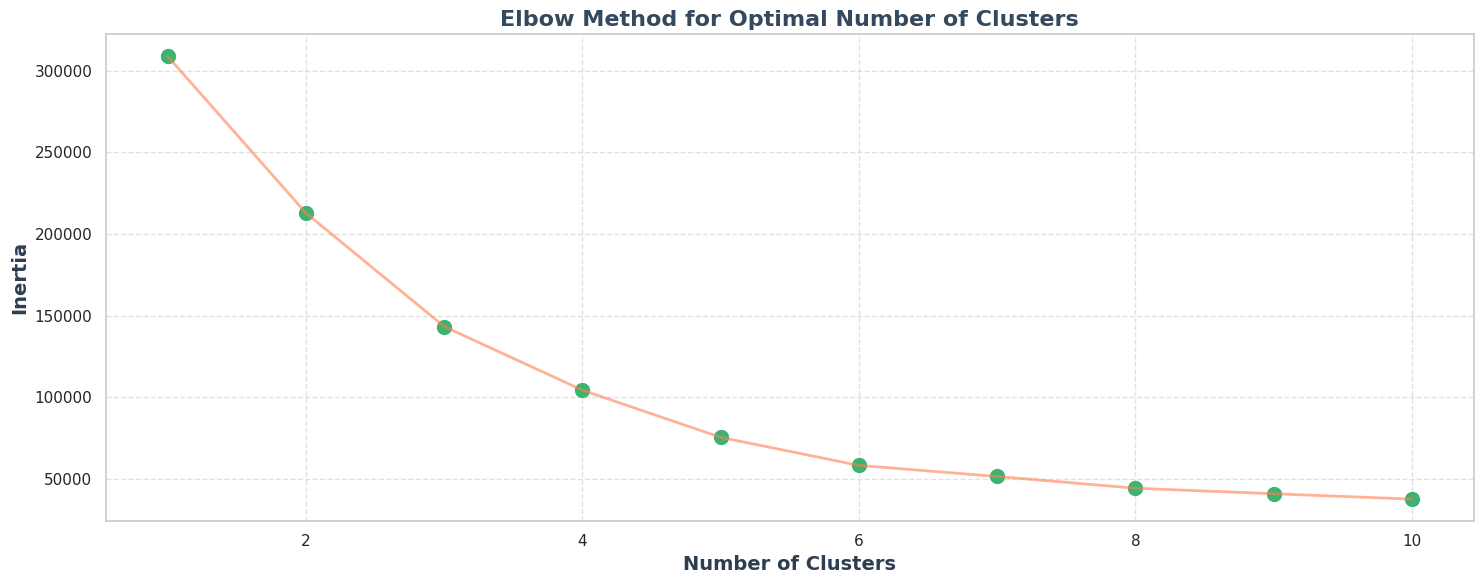

In [85]:

# Create the plot
plt.figure(1, figsize=(15, 6))

# Plot inertia values as circles for each point, using a vibrant color
plt.plot(np.arange(1, 11), inertia, 'o', markersize=10, color='mediumseagreen', label='Inertia')

# Plot the line connecting the points with a semi-transparent line for smoothness
plt.plot(np.arange(1, 11), inertia, '-', color='coral', alpha=0.6, linewidth=2)

# Add labels with bold text for a professional appearance
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold', color='#2c3e50')
plt.ylabel('Inertia', fontsize=14, fontweight='bold', color='#2c3e50')

# Add grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Title with bold and larger font
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16, fontweight='bold', color='#34495e')

# Display the plot with tight layout
plt.tight_layout()
plt.show()

In [54]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [55]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

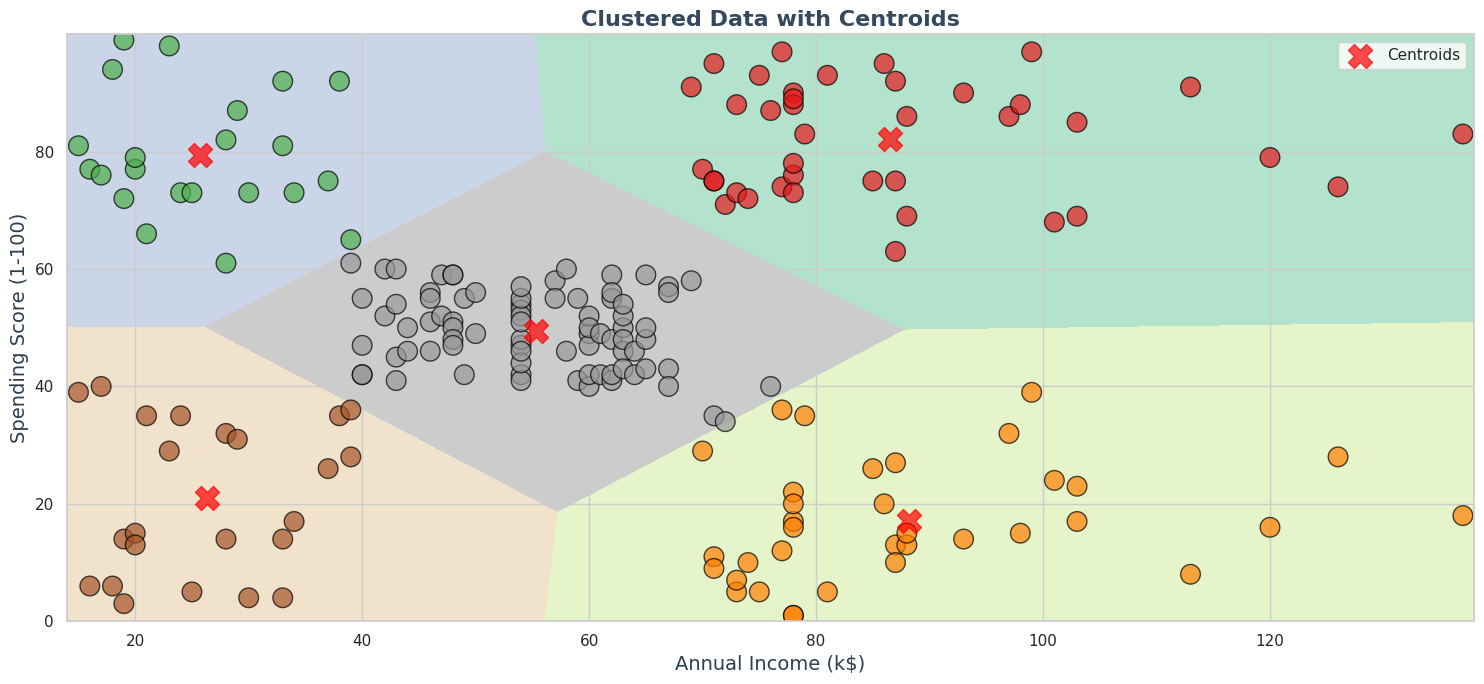

In [75]:
# Create the plot
plt.figure(1, figsize=(15, 7))

# Clear the figure for a fresh plot
plt.clf()

# Reshape Z2 for the decision boundary plot
Z2 = Z2.reshape(xx.shape)

# Plot decision boundaries with a smooth pastel color scheme
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter plot for the data points, colored by their labels
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
            c=labels2, s=200, edgecolors='black', alpha=0.7, cmap='Set1')

# Scatter plot for the centroids with larger red markers
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=300, c='red', alpha=0.7, marker='X', label='Centroids')

# Adding labels and title
plt.xlabel('Annual Income (k$)', fontsize=14, color='#2c3e50')
plt.ylabel('Spending Score (1-100)', fontsize=14, color='#2c3e50')
plt.title('Clustered Data with Centroids', fontsize=16, fontweight='bold', color='#34495e')

# Adding a legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [57]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

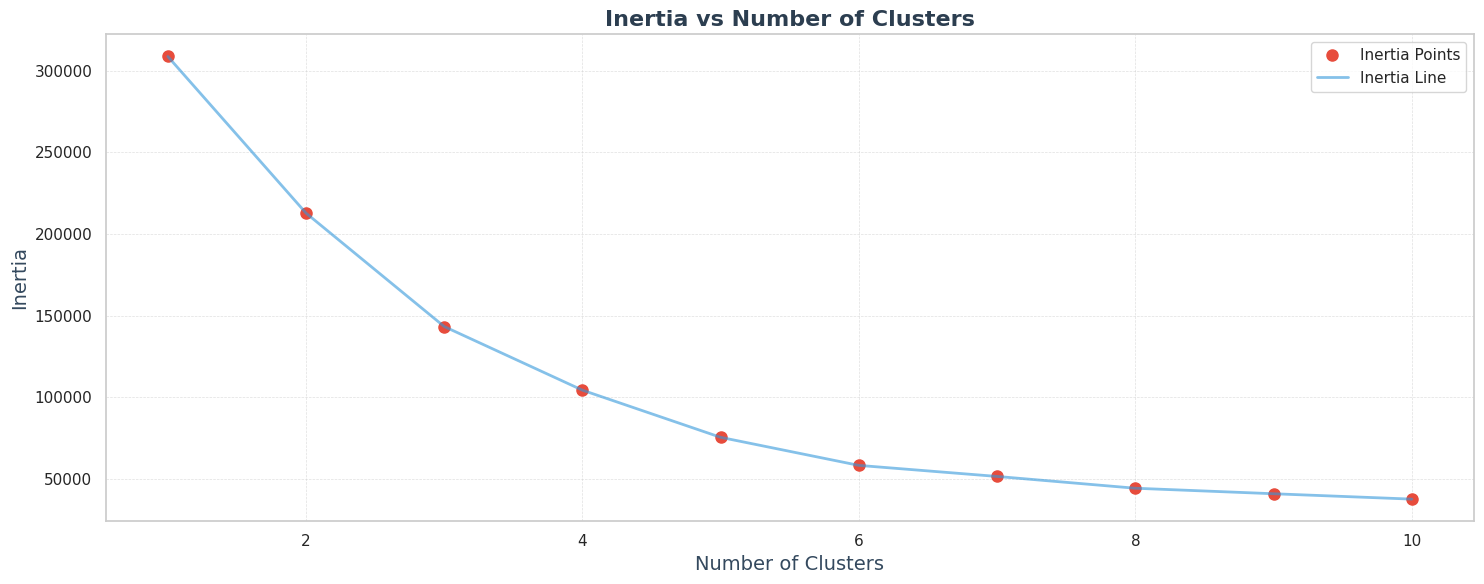

In [74]:
# Create the inertia vs number of clusters plot
plt.figure(1, figsize=(15, 6))

# Plot points with a circle marker, and a smooth line connecting them
plt.plot(np.arange(1, 11), inertia, 'o', color='#e74c3c', markersize=8, label='Inertia Points')  # Red circles for points
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.6, color='#3498db', linewidth=2, label='Inertia Line')  # Blue line

# Add labels and title with enhanced fonts
plt.xlabel('Number of Clusters', fontsize=14, color='#34495e')
plt.ylabel('Inertia', fontsize=14, color='#34495e')
plt.title('Inertia vs Number of Clusters', fontsize=16, fontweight='bold', color='#2c3e50')

# Show grid for better visibility
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Add legend for clarity
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [73]:
# Create a 3D scatter plot with enhanced style
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],  # Color based on the cluster labels
        size=12,  # Smaller marker size for clarity
        colorscale='Viridis',  # Use a vibrant color scale
        line=dict(
            color=df['label3'],
            width=2  # Thin border line for better marker separation
        ),
        opacity=0.8
    )
)

# Layout customization
layout = go.Layout(
    title='Clusters Visualized in 3D',  # Clear title
    scene=dict(
        xaxis=dict(title='Age', titlefont=dict(size=12, color='black')),  # X-axis customization
        yaxis=dict(title='Spending Score', titlefont=dict(size=12, color='black')),  # Y-axis customization
        zaxis=dict(title='Annual Income', titlefont=dict(size=12, color='black'))  # Z-axis customization
    ),
    margin=dict(l=0, r=0, b=0, t=50),  # Reduce margins for better space utilization
    paper_bgcolor='#f4f4f9',  # Light background color for the plot
    plot_bgcolor='#ffffff',  # White background for the plot area
)

# Creating the figure and displaying it
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

# Feature Selection For The Model

*   Annual income and Spending Score

In [61]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label3
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
5,6,Female,22,17,76,5
6,7,Female,35,18,6,4
7,8,Female,23,18,94,5
8,9,Male,64,19,3,4
9,10,Female,30,19,72,5


In [62]:
X= df.iloc[:, [3,4]].values

# Building the Model

## KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

In [63]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

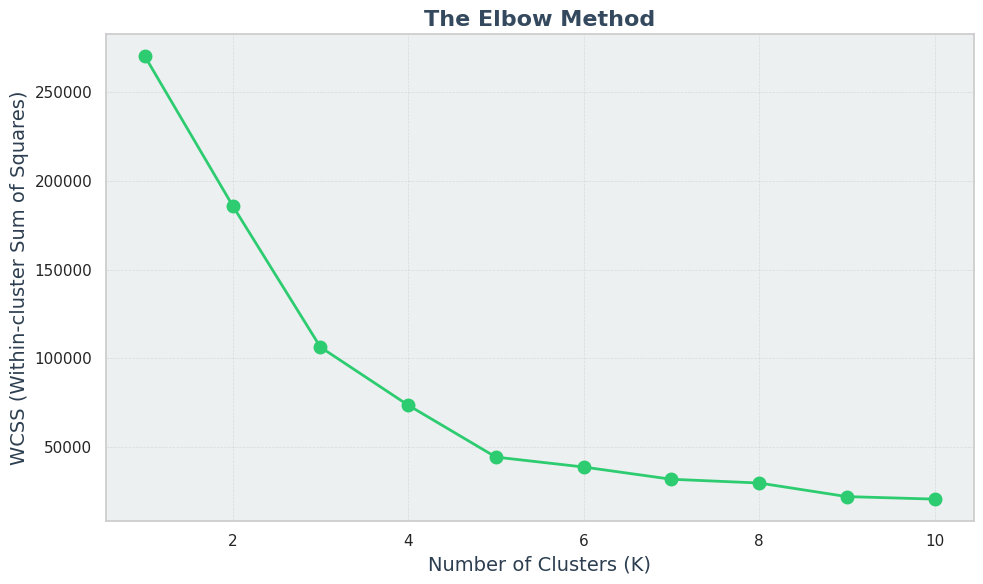

In [72]:
# Visualizing the Elbow method for optimal K
plt.figure(figsize=(10, 6))

# Plot with a smooth line and bold markers
plt.plot(range(1, 11), wcss, marker='o', color='#2ecc71', linestyle='-', linewidth=2, markersize=8, markeredgewidth=2)

# Add Title and Labels with customized fonts
plt.title('The Elbow Method', fontsize=16, fontweight='bold', color='#34495e')
plt.xlabel('Number of Clusters (K)', fontsize=14, color='#2c3e50')
plt.ylabel('WCSS (Within-cluster Sum of Squares)', fontsize=14, color='#2c3e50')

# Grid and background customization
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.gca().set_facecolor('#ecf0f1')  # Subtle light gray background

# Show plot with tight layout
plt.tight_layout()
plt.show()

In [65]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

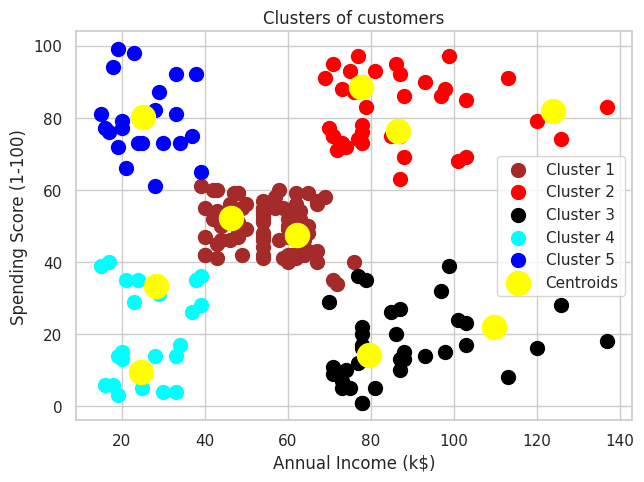

In [70]:
#Visualizing all the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'brown', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Model Interpretation

Cluster 1: Earning high but spending less

Cluster 2 : Average in terms of earning and spending

Cluster 3 : Earning high and also spending high (TARGET SET)

Cluster 4 : Earning less but spending more

Cluster 5 : Earning less , spending less